In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [236]:
df6 = pd.read_csv('Nashville Accidents6(added holiday).csv', index_col=0)

In [272]:
df6.head()

,number_of_motor_vehicles,hit_and_run,collision_type_description,weather_description,illumination_description,latitude,longitude,month,hour,injury_or_fatality,day_of_week,holiday
0,2,0,ANGLE,RAIN,DARK - LIGHTED,36.1605,-86.7942,1,22,0,3,0
1,2,0,ANGLE,CLEAR,DAWN,36.1109,-86.9220,1,6,0,0,1
2,2,0,SIDESWIPE - SAME DIRECTION,CLOUDY,DAYLIGHT,36.1913,-86.7333,2,6,0,4,0
3,2,0,ANGLE,CLEAR,DAYLIGHT,36.1508,-86.7502,2,15,1,1,0
4,2,0,ANGLE,CLEAR,DAYLIGHT,36.0337,-86.5886,3,11,0,3,0


In [271]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34429 entries, 0 to 34579
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   number_of_motor_vehicles    34429 non-null  int64  
 1   hit_and_run                 34429 non-null  int64  
 2   collision_type_description  34429 non-null  object 
 3   weather_description         34429 non-null  object 
 4   illumination_description    34429 non-null  object 
 5   latitude                    34429 non-null  float64
 6   longitude                   34429 non-null  float64
 7   month                       34429 non-null  int64  
 8   hour                        34429 non-null  int64  
 9   injury_or_fatality          34429 non-null  int64  
 10  day_of_week                 34429 non-null  int64  
 11  holiday                     34429 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 3.4+ MB


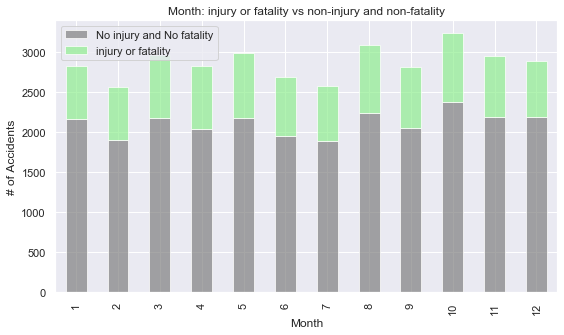

In [246]:
month = df6.groupby(['month','injury_or_fatality'])['month'].count().unstack()
mon = month.plot(kind = 'bar', stacked = True, figsize=(9,5),
                   title = 'Month: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = .70)
mon.set_xlabel('Month')
mon.set_ylabel('# of Accidents')
mon.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

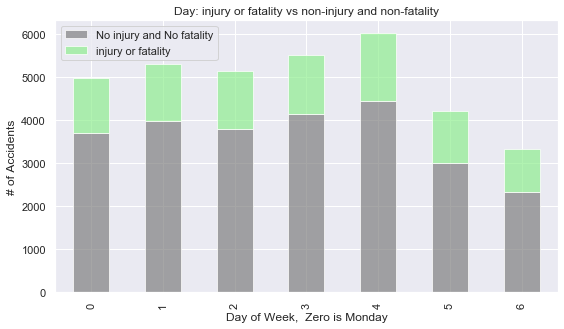

In [251]:
day = df6.groupby(['day_of_week','injury_or_fatality'])['day_of_week'].count().unstack()
da = day.plot(kind = 'bar', stacked = True, figsize=(9,5),
                   title = 'Day: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = .70)
da.set_xlabel('Day of Week,  Zero is Monday')
da.set_ylabel('# of Accidents')
da.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

# Day 5 and 6 (the weekend) have less accidents, Day 4 (Friday) has the most

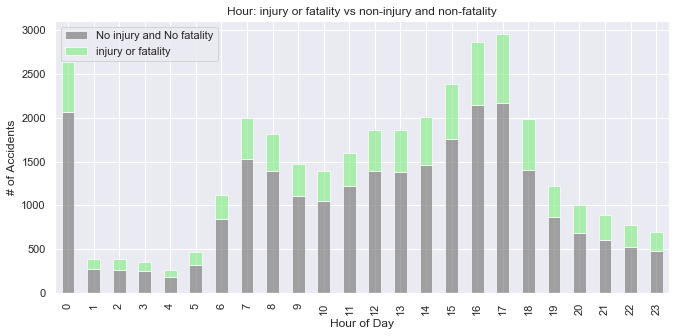

In [255]:
hour = df6.groupby(['hour','injury_or_fatality'])['hour'].count().unstack()
ho = hour.plot(kind = 'bar', stacked = True, figsize=(11,5),
                   title = 'Hour: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = .70)
ho.set_xlabel('Hour of Day')
ho.set_ylabel('# of Accidents')
ho.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

#12-1 am, 3-6 pm have the most accidents with higher precentage of injury or death

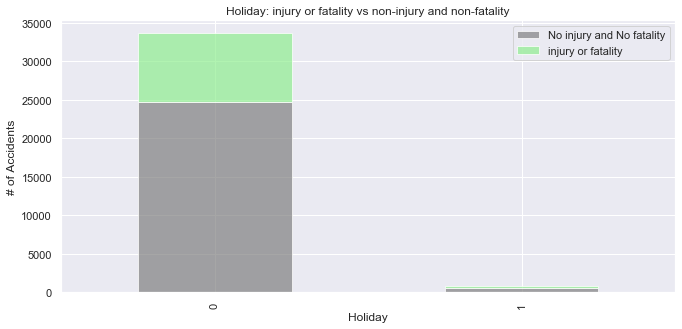

In [256]:
holiday = df6.groupby(['holiday','injury_or_fatality'])['holiday'].count().unstack()
hol = holiday.plot(kind = 'bar', stacked = True, figsize=(11,5),
                   title = 'Holiday: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = .70)
hol.set_xlabel('Holiday')
hol.set_ylabel('# of Accidents')
hol.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

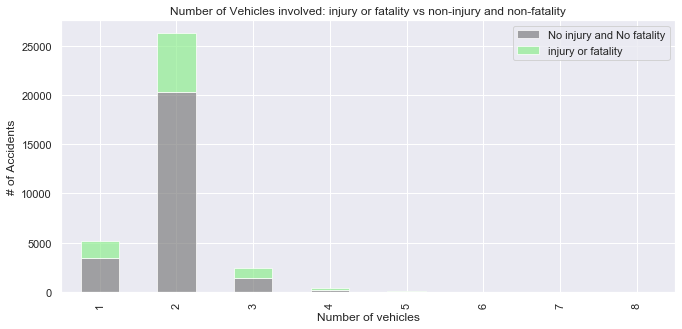

In [257]:
num_veh = df6.groupby(['number_of_motor_vehicles','injury_or_fatality'])['number_of_motor_vehicles'].count().unstack()
nv = num_veh.plot(kind = 'bar', stacked = True, figsize=(11,5),
                   title = 'Number of Vehicles involved: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = .70)
nv.set_xlabel('Number of vehicles')
nv.set_ylabel('# of Accidents')
nv.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

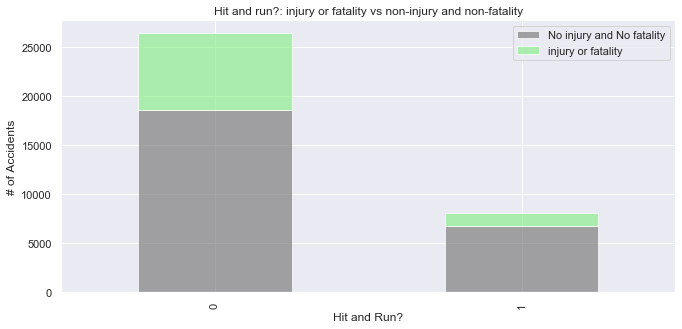

In [259]:
hit_run = df6.groupby(['hit_and_run','injury_or_fatality'])['hit_and_run'].count().unstack()
hit = hit_run.plot(kind = 'bar', stacked = True, figsize=(11,5),
                   title = 'Hit and run?: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = .70)
hit.set_xlabel('Hit and Run?')
hit.set_ylabel('# of Accidents')
hit.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

#hit and run had lower percentage of injury or fatality

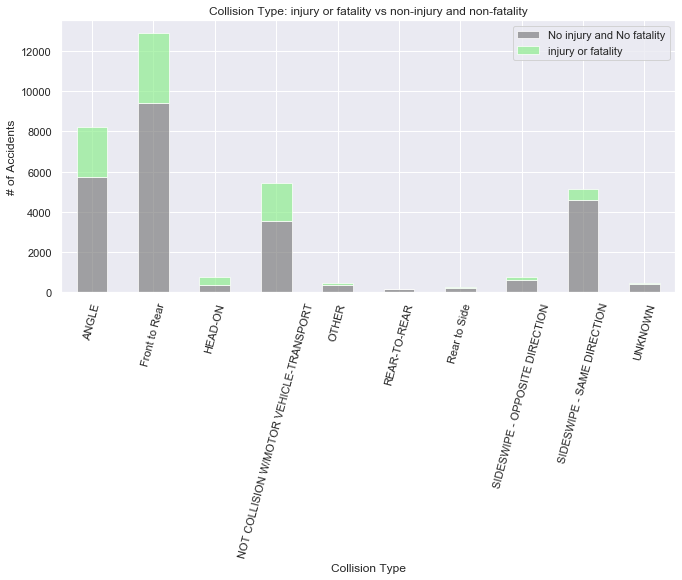

In [265]:
coll = df6.groupby(['collision_type_description','injury_or_fatality'])['collision_type_description'].count().unstack()
col = coll.plot(kind = 'bar', stacked = True, figsize=(11,5),
                   title = 'Collision Type: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = .70)
col.set_xlabel('Collision Type')
col.set_ylabel('# of Accidents')
col.legend(['No injury and No fatality', 'injury or fatality'])
plt.xticks(rotation = 75)
plt.show()


#both swiping features had lower percentage of injury or fatality; Angle, Front to Rear, Head-on and 
#stationary object had higher percentage.

In [275]:
df6['weather_description'].isnull().value_counts()

False    34429
Name: weather_description, dtype: int64

injury_or_fatality         0       1
weather_description                 
BLOWING SNOW            12.0     1.0
CLEAR                17399.0  6234.0
CLOUDY                3554.0  1329.0
FOG                     44.0    26.0
OTHER (NARRATIVE)       12.0    10.0
RAIN                  3740.0  1400.0
SEVERE CROSSWIND         4.0     NaN
SLEET, HAIL             45.0    19.0
SMOG, SMOKE              3.0     NaN
SNOW                   231.0    48.0
UNKNOWN                303.0    15.0


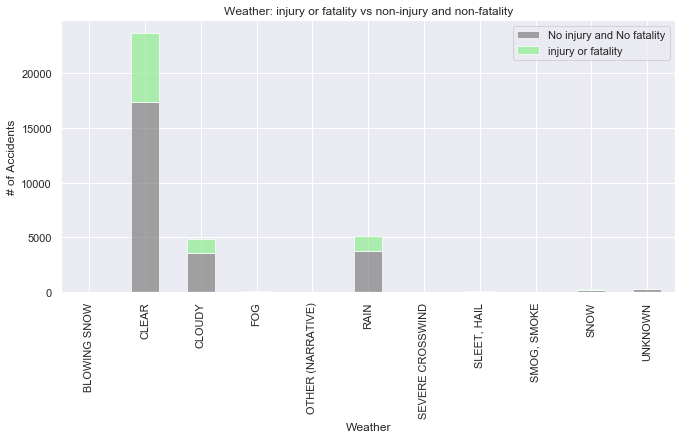

In [276]:
print(df6.groupby(['weather_description','injury_or_fatality'])['weather_description'].count().unstack())

weather = df6.groupby(['weather_description','injury_or_fatality'])['weather_description'].count().unstack()
w = weather.plot(kind = 'bar', stacked = True, figsize=(11,5),
                   title = 'Weather: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = .70)
w.set_xlabel('Weather')
w.set_ylabel('# of Accidents')
w.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

#no NaN's in data(see cell above), Nan here just shows no accident with injury or death with "severe crosswind" or 
#"smog, smoke"

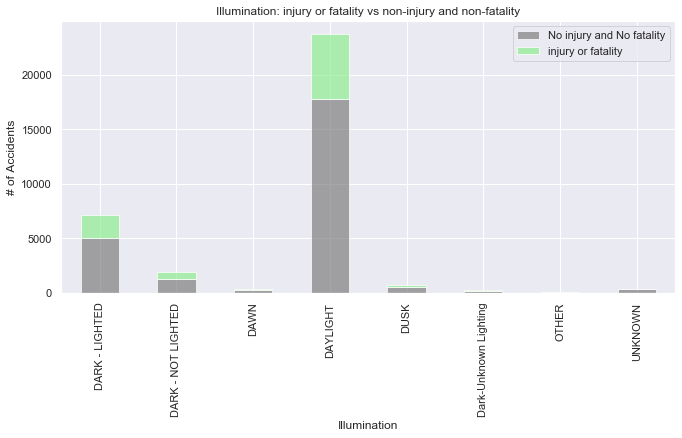

In [262]:
illum = df6.groupby(['illumination_description','injury_or_fatality'])['illumination_description'].count().unstack()
ill = illum.plot(kind = 'bar', stacked = True, figsize=(11,5),
                   title = 'Illumination: injury or fatality vs non-injury and non-fatality', 
                   color = ['grey','lightgreen'], alpha = .70)
ill.set_xlabel('Illumination')
ill.set_ylabel('# of Accidents')
ill.legend(['No injury and No fatality', 'injury or fatality'])
plt.show()

In [4]:
collision_dummy = pd.get_dummies(df6['collision_type_description'],prefix = 'col_type', drop_first=True)
df6 = pd.concat([df6, collision_dummy], axis = 1)
df6.drop(['collision_type_description'], axis=1, inplace=True)       #creating dummy columns

,number_of_motor_vehicles,hit_and_run,weather_description,illumination_description,latitude,longitude,month,hour,injury_or_fatality,day_of_week,holiday,col_type_Front to Rear,col_type_HEAD-ON,col_type_NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,col_type_OTHER,col_type_REAR-TO-REAR,col_type_Rear to Side,col_type_SIDESWIPE - OPPOSITE DIRECTION,col_type_SIDESWIPE - SAME DIRECTION,col_type_UNKNOWN
0,2,0,RAIN,DARK - LIGHTED,36.1605,-86.7942,1,22,0,3,0,0,0,0,0,0,0,0,0,0
1,2,0,CLEAR,DAWN,36.1109,-86.9220,1,6,0,0,1,0,0,0,0,0,0,0,0,0
2,2,0,CLOUDY,DAYLIGHT,36.1913,-86.7333,2,6,0,4,0,0,0,0,0,0,0,0,1,0
3,2,0,CLEAR,DAYLIGHT,36.1508,-86.7502,2,15,1,1,0,0,0,0,0,0,0,0,0,0
4,2,0,CLEAR,DAYLIGHT,36.0337,-86.5886,3,11,0,3,0,0,0,0,0,0,0,0,0,0


In [5]:
weather_dummy = pd.get_dummies(df6['weather_description'],prefix = 'weather', drop_first=True)
df6 = pd.concat([df6, weather_dummy], axis = 1)
df6.drop(['weather_description'], axis=1, inplace=True)


,number_of_motor_vehicles,hit_and_run,illumination_description,latitude,longitude,month,hour,injury_or_fatality,day_of_week,holiday,...,weather_CLEAR,weather_CLOUDY,weather_FOG,weather_OTHER (NARRATIVE),weather_RAIN,weather_SEVERE CROSSWIND,"weather_SLEET, HAIL","weather_SMOG, SMOKE",weather_SNOW,weather_UNKNOWN
0,2,0,DARK - LIGHTED,36.1605,-86.7942,1,22,0,3,0,...,0,0,0,0,1,0,0,0,0,0
1,2,0,DAWN,36.1109,-86.9220,1,6,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,2,0,DAYLIGHT,36.1913,-86.7333,2,6,0,4,0,...,0,1,0,0,0,0,0,0,0,0
3,2,0,DAYLIGHT,36.1508,-86.7502,2,15,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,2,0,DAYLIGHT,36.0337,-86.5886,3,11,0,3,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [8]:
illum_dummy = pd.get_dummies(df6['illumination_description'],prefix = 'illum', drop_first=True)
df6 = pd.concat([df6, illum_dummy], axis = 1)
df6.drop(['illumination_description'], axis=1, inplace=True)

In [10]:
month_dummy = pd.get_dummies(df6['month'],prefix = 'month', drop_first=True)
df6 = pd.concat([df6, month_dummy], axis = 1)
df6.drop(['month'], axis=1, inplace=True)

hour_dummy = pd.get_dummies(df6['hour'],prefix = 'hour', drop_first=True)
df6 = pd.concat([df6, hour_dummy], axis = 1)
df6.drop(['hour'], axis=1, inplace=True)

day_dummy = pd.get_dummies(df6['day_of_week'],prefix = 'day', drop_first=True)
df6 = pd.concat([df6, day_dummy], axis = 1)
df6.drop(['day_of_week'], axis=1, inplace=True)

In [12]:
df6.to_csv('Nashville Accidents7(dummy columns).csv')

In [13]:
df7 = pd.read_csv('Nashville Accidents7(dummy columns).csv', index_col=0)

In [14]:
df7.head()

,number_of_motor_vehicles,hit_and_run,latitude,longitude,injury_or_fatality,holiday,col_type_Front to Rear,col_type_HEAD-ON,col_type_NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,col_type_OTHER,col_type_REAR-TO-REAR,col_type_Rear to Side,col_type_SIDESWIPE - OPPOSITE DIRECTION,col_type_SIDESWIPE - SAME DIRECTION,col_type_UNKNOWN,weather_CLEAR,weather_CLOUDY,weather_FOG,weather_OTHER (NARRATIVE),weather_RAIN,weather_SEVERE CROSSWIND,"weather_SLEET, HAIL","weather_SMOG, SMOKE",weather_SNOW,weather_UNKNOWN,illum_DARK - NOT LIGHTED,illum_DAWN,illum_DAYLIGHT,illum_DUSK,illum_Dark-Unknown Lighting,illum_OTHER,illum_UNKNOWN,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,day_1,day_2,day_3,day_4,day_5,day_6
0,2,0,36.1605,-86.7942,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,2,0,36.1109,-86.9220,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,36.1913,-86.7333,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,0,36.1508,-86.7502,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2,0,36.0337,-86.5886,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [15]:
len(df7.columns)

72

In [16]:
target = df7['injury_or_fatality']
features = df7.drop(columns = ['injury_or_fatality'])

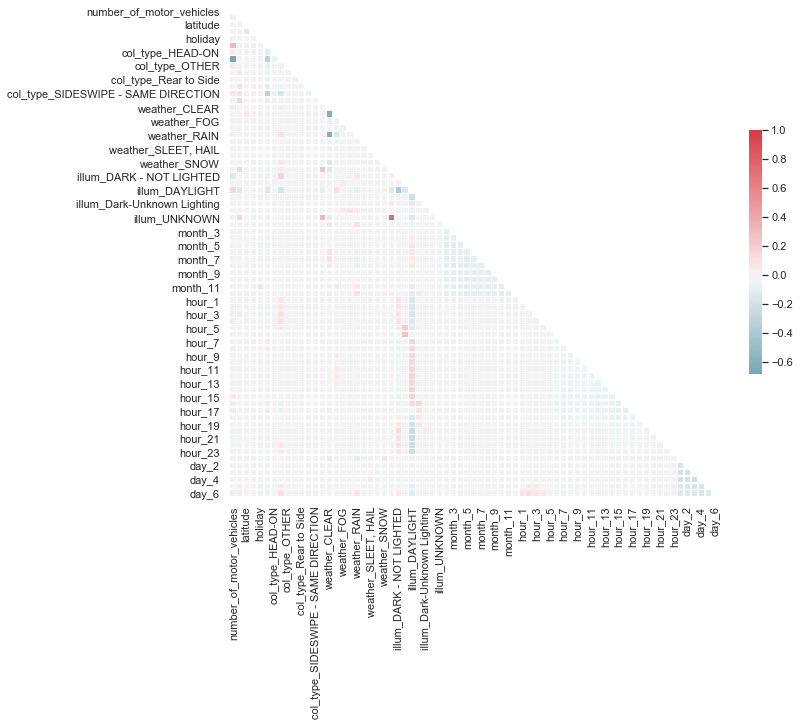

In [19]:
sns.set(style="white")            #this only shows half of features

# Compute the correlation matrix
corr = features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
corr=df7.corr()
corr[abs(corr > 0.85)] 
#fig,ax=plt.subplots(figsize=(15,15))
#sns.heatmap(corr,cmap="BuPu",annot=True)

,number_of_motor_vehicles,hit_and_run,latitude,longitude,injury_or_fatality,holiday,col_type_Front to Rear,col_type_HEAD-ON,col_type_NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,col_type_OTHER,col_type_REAR-TO-REAR,col_type_Rear to Side,col_type_SIDESWIPE - OPPOSITE DIRECTION,col_type_SIDESWIPE - SAME DIRECTION,col_type_UNKNOWN,weather_CLEAR,weather_CLOUDY,weather_FOG,weather_OTHER (NARRATIVE),weather_RAIN,weather_SEVERE CROSSWIND,"weather_SLEET, HAIL","weather_SMOG, SMOKE",weather_SNOW,weather_UNKNOWN,illum_DARK - NOT LIGHTED,illum_DAWN,illum_DAYLIGHT,illum_DUSK,illum_Dark-Unknown Lighting,illum_OTHER,illum_UNKNOWN,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,day_1,day_2,day_3,day_4,day_5,day_6
number_of_motor_vehicles,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hit_and_run,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
injury_or_fatality,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
col_type_Front to Rear,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
col_type_HEAD-ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
col_type_NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
col_type_OTHER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Create correlation matrix
corr_matrix = features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]  #change value if needed
# x.drop(columns=to_drop,inplace = True) #put inplace or not inplace for finalizing drops

corr_matrix

,number_of_motor_vehicles,hit_and_run,latitude,longitude,holiday,col_type_Front to Rear,col_type_HEAD-ON,col_type_NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,col_type_OTHER,col_type_REAR-TO-REAR,col_type_Rear to Side,col_type_SIDESWIPE - OPPOSITE DIRECTION,col_type_SIDESWIPE - SAME DIRECTION,col_type_UNKNOWN,weather_CLEAR,weather_CLOUDY,weather_FOG,weather_OTHER (NARRATIVE),weather_RAIN,weather_SEVERE CROSSWIND,"weather_SLEET, HAIL","weather_SMOG, SMOKE",weather_SNOW,weather_UNKNOWN,illum_DARK - NOT LIGHTED,illum_DAWN,illum_DAYLIGHT,illum_DUSK,illum_Dark-Unknown Lighting,illum_OTHER,illum_UNKNOWN,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,day_1,day_2,day_3,day_4,day_5,day_6
number_of_motor_vehicles,1.000000,0.012692,0.027080,0.016171,0.006635,0.334206,0.042178,0.685601,0.041121,0.011615,0.006598,0.027404,0.076692,0.033674,0.060608,0.011540,0.017234,0.008226,0.060399,0.008820,0.029253,0.000749,0.038154,0.051722,0.132538,0.016943,0.136380,0.023399,0.012733,0.022928,0.048496,0.012981,0.006380,0.006291,0.001217,0.009562,0.002180,0.010057,0.004601,0.002977,0.002456,0.003513,0.052477,0.055092,0.076671,0.071376,0.037336,0.009452,0.028868,0.030857,0.003700,0.001480,0.001066,0.012056,0.017776,0.013108,0.048212,0.055555,0.062424,0.029265,0.013303,0.024941,0.027918,0.042571,0.044280,0.024199,0.018812,0.014256,0.028537,0.043281,0.075767
hit_and_run,0.012692,1.000000,0.015734,0.030166,0.016334,0.066164,0.018861,0.024626,0.016842,0.058353,0.021958,0.086806,0.085478,0.170897,0.006207,0.025847,0.002031,0.005797,0.025103,0.000425,0.004675,0.002207,0.007586,0.155641,0.037012,0.007135,0.134807,0.010776,0.029824,0.008310,0.157886,0.003120,0.003151,0.001610,0.004480,0.009562,0.013952,0.003410,0.007332,0.015173,0.010419,0.001370,0.035498,0.036230,0.051770,0.009786,0.003160,0.027070,0.054906,0.045808,0.032263,0.010424,0.025927,0.017271,0.025557,0.023613,0.025030,0.027767,0.022669,0.006591,0.015916,0.027159,0.026518,0.026632,0.033417,0.013398,0.020261,0.023338,0.013155,0.041349,0.050218
latitude,0.027080,0.015734,1.000000,0.129228,0.012786,0.039550,0.011400,0.032325,0.001808,0.007210,0.008460,0.010111,0.027602,0.003327,0.027347,0.061640,0.010472,0.008663,0.023065,0.000120,0.011007,0.003060,0.006437,0.013496,0.007164,0.018926,0.009549,0.000593,0.017841,0.003669,0.010190,0.001390,0.001711,0.002673,0.001701,0.011251,0.002627,0.007871,0.009429,0.000639,0.002891,0.004552,0.001579,0.001530,0.012686,0.003459,0.002677,0.002221,0.015292,0.005922,0.008533,0.002176,0.003801,0.008152,0.004288,0.004025,0.004508,0.005463,0.001934,0.003154,0.000449,0.007808,0.010541,0.004827,0.002644,0.009078,0.003364,0.003764,0.002346,0.020891,0.005383
longitude,0.016171,0.030166,0.129228,1.000000,0.017400,0.011155,0.029146,0.018719,0.000023,0.009386,0.005892,0.015915,0.013472,0.008846,0.013230,0.040206,0.003905,0.000529,0.016927,0.002486,0.006187,0.002837,0.007014,0.009844,0.004148,0.004062,0.028448,0.011604,0.006429,0.023480,0.010188,0.004880,0.004557,0.005144,0.011782,0.001725,0.007966,0.002124,0.001855,0.006313,0.001023,0.012045,0.004467,0.000959,0.009384,0.009526,0.012235,0.018624,0.015213,0.015829,0.019194,0.002596,0.005774,0.018056,0.013384,0.003444,0.005748,0.000507,0.005023,0.013128,0.004718,0.014709,0.017611,0.005915,0.008448,0.012319,0.011829,0.003024,0.006395,0.010243,0.015320
holiday,0.006635,0.016334,0.012786,0.017400,1.000000,0.018399,0.002470,0.018370,0.005672,0.008619,0.000899,0.006820,0.007603,0.002700,0.001459,0.014211,0.002696,0.003905,0.017435,0.001665,0.006665,0.001442,0.013959,0.013270,0.007565,0.005158,0.037801,0.023258,0.002567,0.006177,0.012935,0.014811,0.009633,0.046146,0.004547,0.044960,0.002226,0.048502,0.013081,0.012252,0.110237,0.025977,0.007073,0.000101,0.010136,0.004574,0.001745,0.009929,0.014511,0.008911,0.003088,0.000447,0.007490,0

In [46]:
to_drop   #No features to drop, no features have more than absolute corr of .75

[]

In [49]:
#call train_test_split on the data and capture the results
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.25)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

# KNN Model

In [50]:
from sklearn.neighbors import KNeighborsClassifier           #F1 score: 0.19849820437479593
from sklearn import metrics

# instantiate the model (using a different value fopr K)
knn = KNeighborsClassifier(n_neighbors=9)


# fit the model with data
knn.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

print('F1 score: ' + str(metrics.f1_score(y_test, y_pred_class)))

F1 score: 0.19849820437479593


In [ ]:
print('F1 score: ' + str(metrics.f1_score(y_test, y_pred_class)))

In [55]:
#Scaled, F1 score: 0.1620888436758223

knn.fit(X_train_scaled, y_train)

y_pred_class = knn.predict(X_test_scaled)

print('F1 score: ' + str(metrics.f1_score(y_test, y_pred_class)))

F1 score: 0.1620888436758223


In [56]:
from sklearn.model_selection import GridSearchCV

In [58]:
weights = ['uniform','distance']
metric = ['minkowski','euclidean','manhattan','chebyshev']
algorithm =  ['auto', 'ball_tree', 'kd_tree', 'brute']

knn_grid = {
    'metric' : metric,
    'n_neighbors' : range(3,9,2),
    'weights' : weights,
    'algorithm': algorithm,
    'leaf_size': [25, 30, 35]
             }
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=knn_grid,verbose = 2, cv = 5,n_jobs = -1, scoring = 'f1')

grid_knn.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 41.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 77.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 117.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 156.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 30, 35],
                         'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev'],
                         'n_neighbors': range(3, 9, 2),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=2)

In [59]:
print(grid_knn.best_score_)   #F1 score 0.3252251404660803
print(grid_knn.best_params_)
print(grid_knn.best_estimator_)

# output:
# {'algorithm': 'auto', 'leaf_size': 25, 'metric': 'chebyshev', 'n_neighbors': 3, 'weights': 'distance'}
# KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='chebyshev',
#                      metric_params=None, n_jobs=None, n_neighbors=3, p=2,
#                      weights='distance')


0.3252251404660803
{'algorithm': 'auto', 'leaf_size': 25, 'metric': 'chebyshev', 'n_neighbors': 3, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='chebyshev',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')


# Handling Class Imbalance

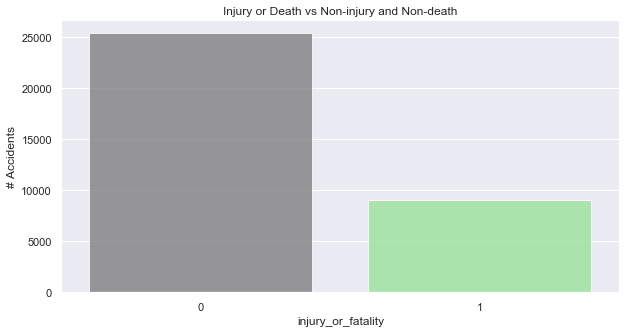

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(target, alpha =.80, palette= ['grey','lightgreen'])
plt.title('Injury or Death vs Non-injury and Non-death')
plt.ylabel('# Accidents')
plt.show()

In [61]:
# concatenate our training data back together
training  = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
non_injury_non_death = training[training.injury_or_fatality==0]
injury_death = training[training.injury_or_fatality==1]

# Get a class count to understand the class imbalance.
print('No injury or death count: '+ str(len(non_injury_non_death)))
print('injury or death count: '+ str(len(injury_death)))

No injury or death count: 19001
injury or death count: 6820


In [62]:
from sklearn.utils import resample

# upsample minority
injury_death_upsampled = resample(injury_death,
                          replace=True, # sample with replacement
                          n_samples=len(non_injury_non_death), # match number in majority class
                          random_state=23) # reproducible results
injury_death_upsampled.shape

(19001, 72)

In [67]:
# combine majority and upsampled minority
upsampled = pd.concat([non_injury_non_death, injury_death_upsampled])

# check new class counts
upsampled['injury_or_fatality'].value_counts()

1    19001
0    19001
Name: injury_or_fatality, dtype: int64

# KNN again with upsampled data + using best params from Gridsearch

In [70]:
# trying KNN again with the balanced dataset + best params from Gridsearch
y_train_upsampled = upsampled['injury_or_fatality']
X_train_upsampled = upsampled.drop('injury_or_fatality', axis=1)

# instantiate the model (using a different value fopr K)
knn = KNeighborsClassifier(n_neighbors=3, algorithm='auto', leaf_size=25, metric='chebyshev', metric_params=None, 
                           n_jobs=None, p=2, weights='distance')


# fit the model with data                                                #KNN summary F1 score:
knn.fit(X_train_upsampled, y_train_upsampled)     #non-scaled, non-balanced                        0.19849820437479593                  
                                                  #scaled, non-balanced                            0.1620888436758223
# make class predictions for the testing set      #non-scaled, non-balanced, gridsearchCV          0.3252251404660803
y_pred_class = knn.predict(X_test)                #non-scaled, balanced, best params from gs       0.33063209076175043

print('F1 score: ' + str(metrics.f1_score(y_test, y_pred_class)))       

F1 score: 0.33063209076175043


# Logistic Regresson

In [177]:
from sklearn.linear_model import LogisticRegression     #scaled                          0.1173690429302875
                                                    #non-scaled                          0.11374407582938387
                                                    #upsampled                           0.46695380959453436
                              #non-upsampled, weight=balanced, scaled, gridsearchCV      0.4674646796758529
#basic logistic regression    #upsampled, weight=none, non-scaled, gridsearchCV          0.6770841090446968

logreg = LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=450,
                    multi_class='auto', n_jobs=None, penalty='l1',
                    random_state=None, solver='saga', tol=0.0001, verbose=0,
                    warm_start=False)

logreg.fit(X_train_upsampled, y_train_upsampled)

y_pred_logreg = logreg.predict(X_test)

print('F1 score: ' + str(metrics.f1_score(y_test, y_pred_logreg))) 


F1 score: 0.4649318463444857


In [183]:
grid_logr.best_estimator_.coef_

array([[ 0.58551312, -0.73136677,  0.        ,  0.01079391,  0.        ,
        -0.06419352,  0.43046186,  0.83005262,  0.        ,  0.        ,
         0.        ,  0.        , -1.03605131,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.10674073,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.03420883,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.00903177,  0. 

In [185]:
lr_coef_df = pd.DataFrame(data=grid_logr.best_estimator_.coef_)
lr_coef_df.columns = features.columns
lr_coef_df.T

,0
number_of_motor_vehicles,0.585513
hit_and_run,-0.731367
latitude,0.000000
longitude,0.010794
holiday,0.000000
col_type_Front to Rear,-0.064194
col_type_HEAD-ON,0.430462
col_type_NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,0.830053
col_type_OTHER,0.000000
col_type_REAR-TO-REAR,0.000000


In [198]:
lr_coef_df_T2 = lr_coef_df.T[lr_coef_df.T != 0].dropna()
lr_coef_df_T2.sort_values(by=0,ascending=False, inplace=True)
lr_coef_df_T2

,0
col_type_NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,0.830053
number_of_motor_vehicles,0.585513
col_type_HEAD-ON,0.430462
day_6,0.083061
day_5,0.038400
longitude,0.010794
day_3,-0.009032
month_12,-0.034209
col_type_Front to Rear,-0.064194
illum_DAYLIGHT,-0.106741


Text(0.5, 1.0, 'Logistic Regression Coefficients')

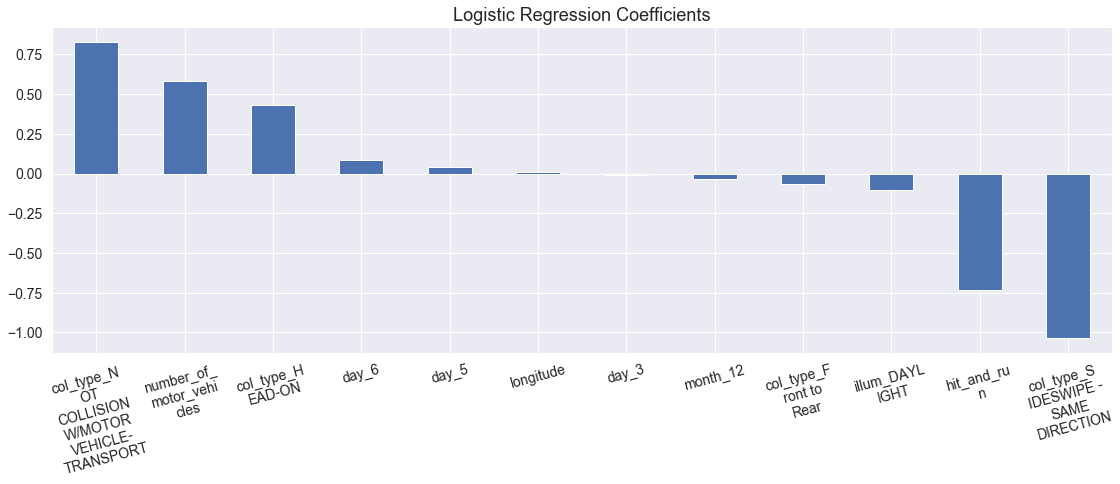

In [235]:
import textwrap
lr_coef_df_T2.plot(kind='bar', legend=False, figsize=(19,6))
#plt.xticks(rotation=70, wrap=True)
#plt.xticks(np.arange(5, 10, step=1))
x_axis = range(12)
labels = lr_coef_df_T2.index
plt.xticks(x_axis, [textwrap.fill(label, 10) for label in labels], 
           rotation = 15, fontsize=14, horizontalalignment="center")
plt.yticks(fontsize = 14)
plt.title(label='Logistic Regression Coefficients', fontsize = 18)

In [82]:
#since scaled has a higher F1, will try upsampling scaled ------ stretch goal cannot concat np.array

# concatenate our training data back together
training_scaled  = pd.concat([X_train_scaled.to_frame(), y_train], axis=1)

# separate minority and majority classes
non_injury_non_death_scaled = training_scaled[training_scaled['injury_or_fatality']==0]
injury_death_scaled = training_scaled[training_scaled['injury_or_fatality']==1]

# Get a class count to understand the class imbalance.
print('No injury or death count: '+ str(len(non_injury_non_death_scaled)))
print('injury or death count: '+ str(len(injury_death_scaled)))

# upsample minority
injury_death_upsampled_scaled = resample(injury_death_scaled,
                          replace=True, # sample with replacement
                          n_samples=len(non_injury_non_death_scaled), # match number in majority class
                          random_state=23) # reproducible results

print(injury_death_upsampled_scaled.shape)

# combine majority and upsampled minority
upsampled_scaled = pd.concat([non_injury_non_death_scaled, injury_death_upsampled_scaled])

# check new class counts
upsampled_scaled['injury_or_fatality'].value_counts()

In [ ]:
type(X_train_scaled) #can't concat np.array

In [88]:
#Grid search log regression            
c_range = [0.0075, 0.01, .0125]    #[0.001, 0.01, 1, 10, 100]
penalty = ['l1']  #l2 #lfbgs error thing doesnt work with L1
solvers = ['saga']  #'sag'
max_iters = [450, 500, 550 ]
logr_params = {
    'C': c_range,
    'penalty' : penalty,
    'solver' : solvers,
    'max_iter' : max_iters
             }

grid_logr = GridSearchCV(LogisticRegression(), logr_params, verbose=3, 
                         cv=5, scoring = 'f1', n_jobs = -1)

grid_logr.fit(X_train_upsampled, y_train_upsampled)

#1st gridsearchCV logreg F1 score: 0.4674646796758529  not upsampled, but weight=balanced, scaled
#2nd gridsearchCV logreg F1 score: 0.6770841090446968  upsampled, weight=none, non-scaled

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0075, 0.01, 0.0125],
                         'max_iter': [450, 500, 550], 'penalty': ['l1'],
                         'solver': ['saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=3)

In [90]:
# examine the best model
print(grid_logr.best_score_)                             #1st F1 score: 0.4674646796758529
print(grid_logr.best_params_)                            #2nd F1 score: 0.6770841090446968
print(grid_logr.best_estimator_)

# 0.4674646796758529
# {'C': 0.01, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
# LogisticRegression(C=0.01, class_weight='balanced', dual=False,
#                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
#                    max_iter=500, multi_class='auto', n_jobs=None, penalty='l1',
#                    random_state=None, solver='saga', tol=0.0001, verbose=0,
#                    warm_start=False)

# 0.6770841090446968
# {'C': 0.01, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
# LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=500,
#                    multi_class='auto', n_jobs=None, penalty='l1',
#                    random_state=None, solver='saga', tol=0.0001, verbose=0,
#                    warm_start=False)

# 0.6770841090446968   same F1 score
# {'C': 0.01, 'max_iter': 450, 'penalty': 'l1', 'solver': 'saga'}
# LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=450,
#                    multi_class='auto', n_jobs=None, penalty='l1',
#                    random_state=None, solver='saga', tol=0.0001, verbose=0,
#                    warm_start=False)


0.6770841090446968
{'C': 0.01, 'max_iter': 450, 'penalty': 'l1', 'solver': 'saga'}
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=450,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


# Decision Tree + gridsearchCV

In [98]:
from sklearn.tree import DecisionTreeClassifier   #non-scaled, non-upsampled 0.0921701140594435
                                                  #scaled,  non-upsampled    0.0921701140594435
                                                  #non-scaled, upsampled     0.6808441688844369
param_tree = {
    'max_depth' : range(3,11),
    'criterion' : ['gini'],
    'min_samples_split' : [0.15,0.2,0.25,0.5]
      }

#create our estimaor
dtree = DecisionTreeClassifier(random_state=1)

#create the instance of GridSearchCV
grid_tree = GridSearchCV(dtree, param_tree, cv=5, scoring='f1')

#fit the Gridsearch to our data
grid_tree.fit(X_train_upsampled,y_train_upsampled)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'], 'max_depth': range(3, 11),
                         'min_samples_split': [0.15,

In [99]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

# 0.0921701140594435
# {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 0.15}
# DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
#                        max_depth=5, max_features=None, max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=0.15,
#                        min_weight_fraction_leaf=0.0, presort='deprecated',
#                        random_state=1, splitter='best')

# 0.0921701140594435
# {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 0.15}
# DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
#                        max_depth=5, max_features=None, max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=0.15,
#                        min_weight_fraction_leaf=0.0, presort='deprecated',
#                        random_state=1, splitter='best')

# 0.6808441688844369
# {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.15}
# DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
#                        max_depth=3, max_features=None, max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=0.15,
#                        min_weight_fraction_leaf=0.0, presort='deprecated',
#                        random_state=1, splitter='best')



0.6808441688844369
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.15}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


# Voting Classifier

In [105]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
                estimators=[('logreg', grid_logr.best_estimator_), 
                            ('knneighbors', grid_knn.best_estimator_), 
                            ('decisiontree', grid_tree.best_estimator_)
                           ], 
                voting='soft')

voting_clf.fit(X_train_upsampled, y_train_upsampled)

vc_preds = voting_clf.predict(X_test)

print(metrics.f1_score(y_test, vc_preds))

0.3523131672597865


In [106]:
# Voting Class - summary - F1 score:
# 0.17495711835334476  non-scaled, non-upsampled
# 0.11934625617635879 scaled, non-upsampled
# 0.3523131672597865 non-scaled, upsampled

# Bagging

In [115]:
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, ExtraTreesRegressor

bc_lr = BaggingClassifier(
            #base_estimator=LogisticRegression(random_state = 1, max_iter = 1000),  #default is decision tree
            n_estimators= 750,
            max_samples= .7,
            max_features= 25,
            oob_score= True
)

bc_lr.fit(X_train_upsampled, y_train_upsampled)

bc_lr_preds = bc_lr.predict(X_test) 

print(metrics.f1_score(y_test, bc_lr_preds))

0.31502029769959405


In [113]:
# Bagging summary - grid_logr.best_estimator_ - n_estimators=100, max_features=6 - F1 score:
# 0.0                  non-scaled, non-upsampled
# 0.0                  scaled, non-upsampled
# 0.4638903531892462   non-scaled, upsampled

# n_estimators=500, max_features=15
# 0.46481309032858853 non-scaled, upsampled

# 0.6757491659927094 non-scaled, upsampled, gridsearchCV, {
#     'n_estimators' : [10,100, 500],
#     'max_samples' : [.6,.7,.8],
#     'max_features' : [10,25,40]
#            }                         best params {'max_features': 40, 'max_samples': 0.8, 'n_estimators': 10}

# 0.6753756592629794
# {'max_features': 40, 'max_samples': 0.8, 'n_estimators': 5}

# 0.675544443681234
# {'max_features': 40, 'max_samples': 0.8, 'n_estimators': 6}

# 0.6758519216220653
# {'max_features': 40, 'max_samples': 0.8, 'n_estimators': 7}

# 0.677157898268134                      <------- Best 'grid_logr.best_estimator_' F1 score from bagging + gridsearch
# {'max_features': 40, 'max_samples': 0.9, 'n_estimators': 7}     

# 0.675811841470542
# {'max_features': 45, 'max_samples': 0.9, 'n_estimators': 7}

#-------------------------------------------------------------

# desicion tree (default) - n_estimators=750, max_features=25
# 0.31502029769959405 non-scaled, upsampled

# grid_tree.best_estimator_
# 0.6775975153317536
# {'max_features': 45, 'max_samples': 0.9, 'n_estimators': 7}

# 0.6785433335987452                     <------- Best 'grid_tree.best_estimator_' F1 score from bagging + gridsearch
# {'max_features': 45, 'max_samples': 0.9, 'n_estimators': 7}

# 0.6735698034922951
# {'max_features': 46, 'max_samples': 0.9, 'n_estimators': 8}

# 0.6763194674233693
# {'max_features': 45, 'max_samples': 0.7, 'n_estimators': 6}

# 0.6779769106997294
# {'max_features': 45, 'max_samples': 0.6, 'n_estimators': 8}

#-------------------------------------------

In [136]:
#grid search for best bagger
#create our estimaor
bag_params = {
    'n_estimators' : [5,6,7,8],
    'max_samples' : [.6,.7,.8],
    'max_features' : [44, 45, 46]
           }

bc_test = BaggingClassifier(
            base_estimator= grid_tree.best_estimator_, 
)
grid_bc_test = GridSearchCV(bc_test, bag_params, cv=5, scoring='f1', n_jobs = -1, verbose = 3)

#fit the Gridsearch to our data
grid_bc_test.fit(X_train_upsampled,y_train_upsampled)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   23.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=3,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                            

In [137]:
print(grid_bc_test.best_score_)
print(grid_bc_test.best_params_)
print(grid_bc_test.best_estimator_) 


0.6779769106997294
{'max_features': 45, 'max_samples': 0.6, 'n_estimators': 8}
BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=0.15,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecate

# Randomn Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rfc = RandomForestClassifier(random_state = 1, n_estimators=1000, max_depth=3, max_features=25)

rfc.fit(X_train_upsampled, y_train_upsampled)

rfc_preds = rfc.predict(X_test)

print(metrics.f1_score(y_test, rfc_preds))


0.4666748496379035


In [143]:
# Summary - Randomn Forest F1 scores:
# 0.0                   non-scaled, non-upsampled
# 0.4666748496379035    non-scaled, upsampled

# 0.684146437020402
# {'max_depth': 3, 'max_features': 30, 'min_samples_split': 2, 'n_estimators': 1000}

# 0.6854050791326267
# {'max_depth': 5, 'max_features': 25, 'min_samples_split': 2, 'n_estimators': 1000}

# 0.6855653224299265
# {'max_depth': 5, 'max_features': 25, 'min_samples_split': 2, 'n_estimators': 2000}

# 0.6856072208506899
# {'max_depth': 5, 'max_features': 25, 'min_samples_split': 2, 'n_estimators': 1500}

# 0.6856072208506899
# {'max_depth': 5, 'max_features': 25, 'min_samples_split': 2, 'n_estimators': 1500}

# 0.6856072208506899
# {'max_depth': 5, 'max_features': 25, 'min_samples_split': 2, 'n_estimators': 1500}

In [157]:
#Randomn Forest + GridsearchCV

rfc_params = {
    'n_estimators' : [1500],
    'max_features' : [24,25,26],           #[25,30]
    'max_depth' : [5],                #[3,4,5,6]
    'min_samples_split' : [2]
#     'max_samples' : [.5,.6,.7],
}

rfc = RandomForestClassifier(
            random_state = 1,
            max_samples = .7,
#             oob_score= True
#             n_estimators= 100,

)
grid_rfc = GridSearchCV(rfc, rfc_params, cv=5, scoring='f1',verbose = 3, n_jobs = -1)

#fit the Gridsearch to our data
grid_rfc.fit(X_train_upsampled,y_train_upsampled)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=0.7,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                    

In [159]:
# examine the best model
print(grid_rfc.best_score_) 
print(grid_rfc.best_params_)
print(grid_rfc.best_estimator_)

0.6856072208506899
{'max_depth': 5, 'max_features': 25, 'min_samples_split': 2, 'n_estimators': 1500}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=25,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [ ]:
#RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 8)

# XGBoost

In [160]:
import xgboost as xgb

In [162]:
xgb.XGBClassifier()

xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.6,  #max feature
                           subsample = 0.5,     #max sub sample
                           learning_rate = 0.1,
                           max_depth = 4,  #on tree
                           alpha = 1,     #don't know for what
                           #scale_pos_weight= y.mean(),  #weighted imbalance so pass this imbalance %
                           n_estimators = 10000)

xg_clf.fit(X_train_upsampled, y_train_upsampled)

xg_clf_preds = xg_clf.predict(X_test)

print(metrics.f1_score(y_test, xg_clf_preds))

0.3740115409275487


In [163]:
# Summary - XGBoost F1 Score:
# 0.3740115409275487    upsampled, log reg single boost
# 0.8680297364639639    upsampled, log reg, gridsearch boost
# {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 5000}

In [164]:
xgb_params = {'n_estimators': [5000],
              'learning_rate': [.01, 0.1],
              'max_depth': [5, 7],
#               'colsample_bytree': [0.5,0.45,0.4],
#               'min_child_weight': [1, 2, 3]
             }

xg_clf_grid = xgb.XGBClassifier(objective = 'binary:logistic')

grid_xgb = GridSearchCV(estimator = xg_clf_grid, param_grid = xgb_params, scoring='f1', n_jobs=-1, verbose=1, cv=5)

grid_xgb.fit(X_train_upsampled, y_train_upsampled)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 127.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=Non

In [165]:
print(grid_xgb.best_estimator_)
print(grid_xgb.best_params_)
print(grid_xgb.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 5000}
0.8680297364639639


In [ ]:
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.1, max_delta_step=0, max_depth=7,
#               min_child_weight=1, missing=nan, monotone_constraints='()',
#               n_estimators=5000, n_jobs=0, num_parallel_tree=1,
#               objective='binary:logistic', random_state=0, reg_alpha=0,
#               reg_lambda=1, scale_pos_weight=1, subsample=1,
#               tree_method='exact', validate_parameters=1, verbosity=None)
# {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 5000}
# 0.8680297364639639

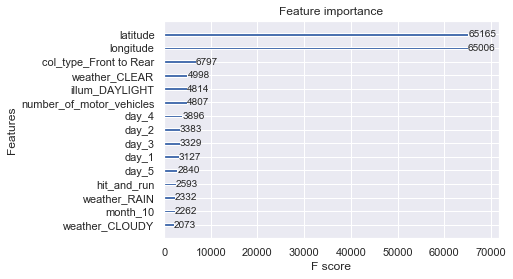

In [181]:
from xgboost import plot_importance

plot_importance(grid_xgb.best_estimator_, max_num_features=15)

#different from Logistic Regression coeffcients!!!!!

In [179]:
grid_xgb.cv_results_

{'mean_fit_time': array([1213.22542677, 1749.65544162, 1243.7277976 , 1577.40009995]),
 'std_fit_time': array([ 16.35744387,  85.14122075, 135.6812739 , 178.52190402]),
 'mean_score_time': array([ 6.79375725, 10.94317703,  6.42359295, 12.23385234]),
 'std_score_time': array([0.72628672, 0.61512471, 0.62687638, 4.89859108]),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.1, 0.1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[5, 7, 5, 7],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[5000, 5000, 5000, 5000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5000},
  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 5000},
  {'learning_rate': 0.1, 'max_depth': 5, 'n_es

In [ ]:
# Summary of all models - Best F1 scores

# 0.33063209076175043 KNN(gridsearchCV)
# 0.3523131672597865  VotingClassifier
# 0.6770841090446968  Logistic regression(gridsearchCV)
# 0.677157898268134   Logistic regression(bagging + gridsearchCV)
# 0.6785433335987452  Decisiontree(bagging + gridsearchCV)
# 0.6808441688844369  Decisiontree(gridsearchCV)
# 0.6856072208506899  RandomnForest(gridsearchCV)
# 0.8680297364639639  Decisiontree(xgboost + gridsearchCV)